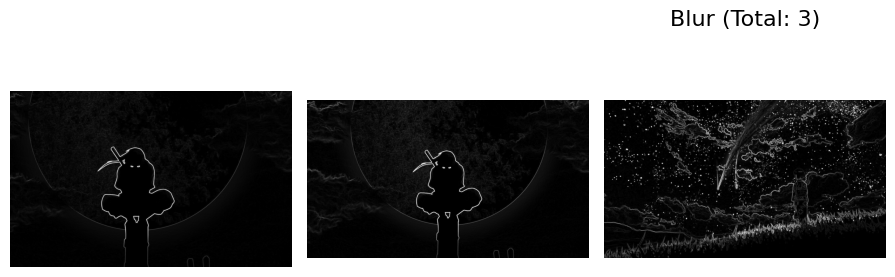

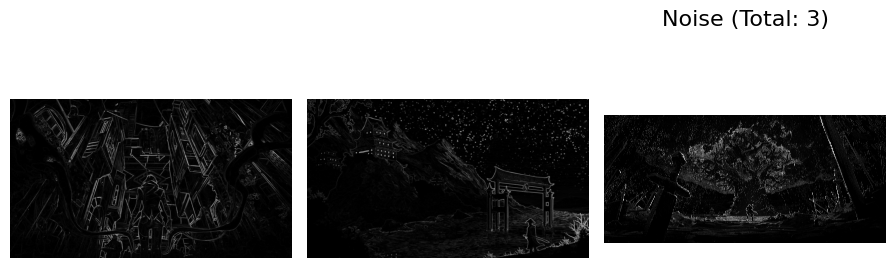

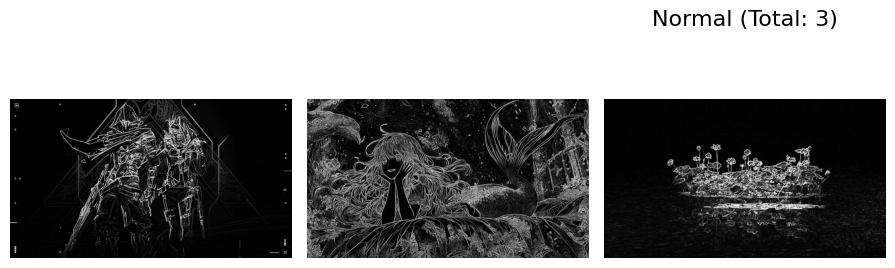

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Set the paths to the folders
base_folder = 'data_kk'
folders = {
    'Blur': os.path.join(base_folder, 'kk_blur'),
    'Noise': os.path.join(base_folder, 'kk_noise'),
    'Normal': os.path.join(base_folder, 'kk_normal')
}

# Sobel conversion function
def apply_sobel(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.hypot(sobel_x, sobel_y)
    return cv2.convertScaleAbs(sobel)

# Function to load, process, and display images
def process_and_display_images(folder, title):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            image = cv2.imread(img_path)
            sobel_image = apply_sobel(image)
            images.append(sobel_image)
    
    count = len(images)
    cols = 5
    rows = (count // cols) + 1
    plt.figure(figsize=(15, rows * 3))
    plt.suptitle(f'{title} (Total: {count})', fontsize=16)
    
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Process and display images for each class
for class_name, folder_path in folders.items():
    process_and_display_images(folder_path, class_name)


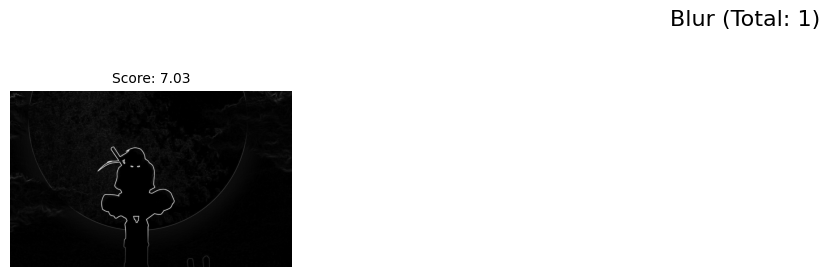

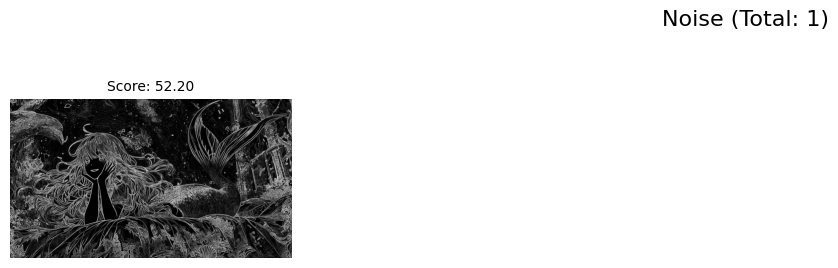

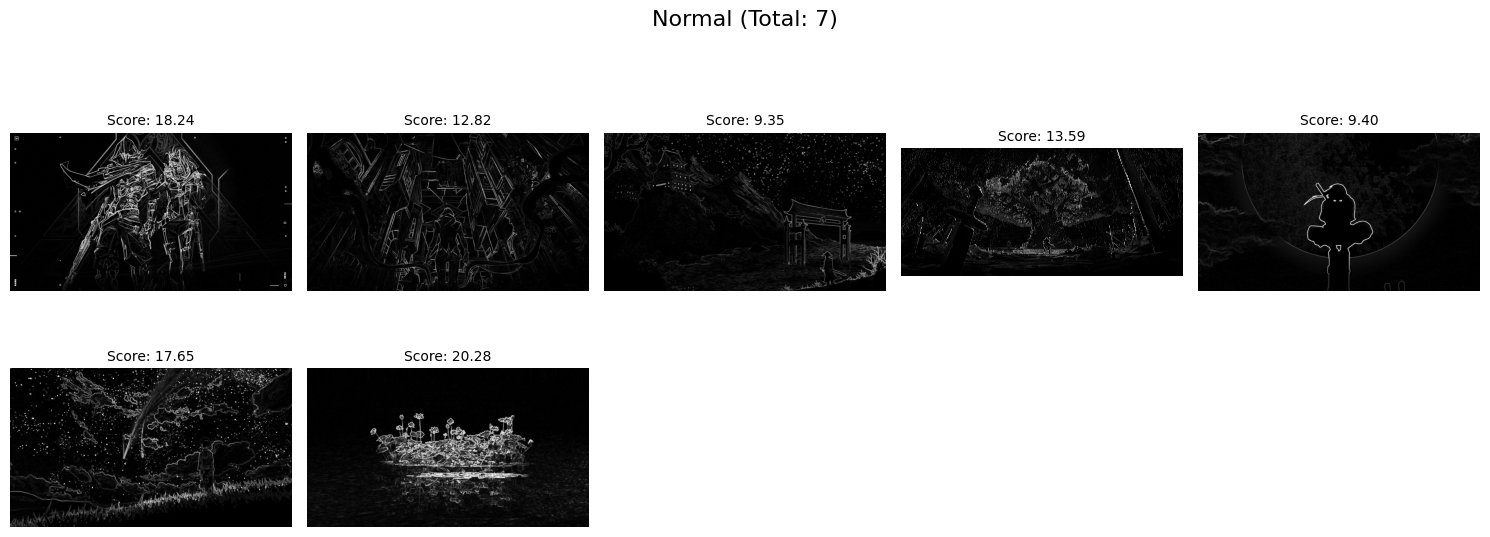

In [6]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Set the paths to the folders
base_folder = 'data_kk'
folders = {
    'Blur': os.path.join(base_folder, 'kk_blur'),
    'Noise': os.path.join(base_folder, 'kk_noise'),
    'Normal': os.path.join(base_folder, 'kk_normal')
}

# Sobel conversion function
def apply_sobel(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.hypot(sobel_x, sobel_y)
    return cv2.convertScaleAbs(sobel)

# Function to load, process, and display images
def process_and_display_images(folder, title):
    images = []
    scores = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            image = cv2.imread(img_path)
            sobel_image = apply_sobel(image)
            images.append(sobel_image)

            # Calculate mean Sobel score for the image
            score = np.mean(sobel_image)
            scores.append(score)
    
    count = len(images)
    cols = 5
    rows = (count // cols) + 1
    plt.figure(figsize=(15, rows * 3))
    plt.suptitle(f'{title} (Total: {count})', fontsize=16)
    
    for i, (img, score) in enumerate(zip(images, scores)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Score: {score:.2f}', fontsize=10)
        plt.axis('off')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Resize images to a common height for OpenCV display
    target_height = 500  # Set a desired height
    resized_images = [cv2.resize(img, (int(img.shape[1] * (target_height / img.shape[0])), target_height)) for img in images[:5]]
    
    # Stack the resized images horizontally
    combined_image = np.hstack(resized_images)
    cv2.imshow(f'Sobel {title}', combined_image)

# Process and display images for each class
for class_name, folder_path in folders.items():
    process_and_display_images(folder_path, class_name)

cv2.waitKey(0)  # Wait until a key is pressed to close all windows
cv2.destroyAllWindows()
